In [41]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
# Importing the dataset
dataset_battles = pd.read_csv('battles.csv')

In [43]:
dataset_battles.columns.values

array(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4',
       'defender_1', 'defender_2', 'defender_3', 'defender_4',
       'attacker_outcome', 'battle_type', 'major_death', 'major_capture',
       'attacker_size', 'defender_size', 'attacker_commander',
       'defender_commander', 'summer', 'location', 'region', 'note'],
      dtype=object)

In [44]:
# 删除没用的列
variables_to_remove = ['defender_3', 'defender_4']
dataset_battles.drop(variables_to_remove, axis = 1, inplace = True)
dataset_battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [45]:
missing_df = dataset_battles.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']

In [46]:
missing_df['filling percentage']=(dataset_battles.shape[0]-missing_df['missing values'])/dataset_battles.shape[0]*100
missing_df.sort_values('filling percentage').reset_index(drop = True)

,variable,missing values,filling percentage
0,attacker_4,36,5.263158
1,defender_2,36,5.263158
2,attacker_3,35,7.894737
3,note,33,13.157895
4,attacker_2,28,26.315789
5,defender_size,19,50.000000
6,attacker_size,14,63.157895
7,defender_commander,10,73.684211
8,defender_king,3,92.105263
9,attacker_king,2,94.736842


In [47]:
dataset_battles['attacker_4'] = dataset_battles['attacker_4'].fillna('no')
dataset_battles['defender_2'] = dataset_battles['defender_2'].fillna('no')
dataset_battles['attacker_3'] = dataset_battles['attacker_3'].fillna('no')
dataset_battles['note'] = dataset_battles['note'].fillna('no')
dataset_battles['attacker_2'] = dataset_battles['attacker_2'].fillna('no')
dataset_battles['defender_size'] = dataset_battles['defender_size'].fillna(0)
dataset_battles['attacker_size'] = dataset_battles['attacker_size'].fillna(0)
dataset_battles['defender_commander'] = dataset_battles['defender_commander'].fillna('no')
dataset_battles['defender_king'] = dataset_battles['defender_king'].fillna('no')
dataset_battles['attacker_king'] = dataset_battles['attacker_king'].fillna('no')
dataset_battles['location'] = dataset_battles['location'].fillna('no')
dataset_battles['summer'] = dataset_battles['summer'].fillna(0)
dataset_battles['attacker_commander'] = dataset_battles['attacker_commander'].fillna('no')
dataset_battles['major_capture'] = dataset_battles['major_capture'].fillna(0)
dataset_battles['attacker_outcome'] = dataset_battles['attacker_outcome'].fillna('no')
dataset_battles['battle_type'] = dataset_battles['battle_type'].fillna('no')
dataset_battles['defender_1'] = dataset_battles['defender_1'].fillna('no')
dataset_battles['major_death'] = dataset_battles['major_death'].fillna(0)

In [48]:
#统计缺失值
missing_df = dataset_battles.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling percentage']=(dataset_battles.shape[0]-missing_df['missing values'])/dataset_battles.shape[0]*100
missing_df.sort_values('filling percentage').reset_index(drop = True)

,variable,missing values,filling percentage
0,name,0,100.0
1,location,0,100.0
2,summer,0,100.0
3,defender_commander,0,100.0
4,attacker_commander,0,100.0
5,defender_size,0,100.0
6,attacker_size,0,100.0
7,major_capture,0,100.0
8,major_death,0,100.0
9,battle_type,0,100.0


In [49]:
#创建包含自变量的矩阵
X = dataset_battles.iloc[:,:-1].values
#创建包含因变量的矩阵
Y = dataset_battles.iloc[:,-1].values

In [50]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelEncoder_X = LabelEncoder()
X[:,0] = labelEncoder_X.fit_transform(X[:,0])
X[:,3] = labelEncoder_X.fit_transform(X[:,3])
X[:,4] = labelEncoder_X.fit_transform(X[:,4])
X[:,5] = labelEncoder_X.fit_transform(X[:,5])
X[:,6] = labelEncoder_X.fit_transform(X[:,6])
X[:,7] = labelEncoder_X.fit_transform(X[:,7])
X[:,8] = labelEncoder_X.fit_transform(X[:,8])
X[:,9] = labelEncoder_X.fit_transform(X[:,9])
X[:,10] = labelEncoder_X.fit_transform(X[:,10])
X[:,11] = labelEncoder_X.fit_transform(X[:,11])
X[:,12] = labelEncoder_X.fit_transform(X[:,12])
X[:,17] = labelEncoder_X.fit_transform(X[:,17])
X[:,18] = labelEncoder_X.fit_transform(X[:,18])
X[:,20] = labelEncoder_X.fit_transform(X[:,20])
X[:,21] = labelEncoder_X.fit_transform(X[:,21])

In [65]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [66]:
# Feature Scaling 特征缩放
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [67]:
X_train_battle = pd.DataFrame(X_train)
X_train_battle.to_csv('X_train_battles.csv')

In [68]:
X_test_battle = pd.DataFrame(X_test)
X_test_battle.to_csv('X_test_battles.csv')

In [69]:
Y_train_battle = pd.DataFrame(Y_train)
Y_train_battle.to_csv('Y_train_battles.csv')

In [70]:
Y_test_battle = pd.DataFrame(Y_test)
Y_test_battle.to_csv('Y_test_battles.csv')

ValueError: 'label' must be of length 'x'

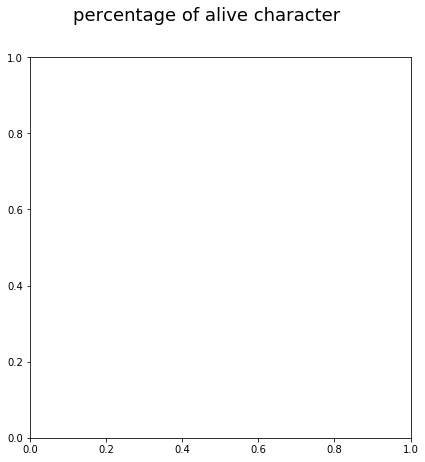

In [74]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
aliveData = pd.value_counts(dataset_battles['attacker_outcome'])
f.suptitle("percentage of alive character", fontsize = 18.)
plt.axes(aspect=2)
plt.pie(x=aliveData, labels = ("alive", "dead"), autopct = "%.2f%%", explode=[0.1, 0],shadow=True, labeldistance=1.1, startangle=90, pctdistance=0.6)